# Analyzing Insurance Claim Using SQL and Python

 I've uploaded the dashboard chart to GitHub for your reference. Although interactive charts won't be directly viewable on GitHub, you can easily access and explore them. Simply download the project files and run them on Google Colab to fully interact with the charts.

In [ ]:
!pip install pandasql
!pip install plotly
!pip install streamlit

In [2]:
import pandasql as psql
import pandas as pd
import plotly.express as py
import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurace_tabel = pd.read_csv('/content/insurance_data.csv')
employee_tabel = pd.read_csv('/content/employee_data.csv')
vendor_tabel = pd.read_csv('/content/vendor_data.csv')

In [4]:
query = """
SELECT * FROM insurace_tabel
LIMIT 5;
"""
psql.sqldf(query, locals())

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [5]:
query = """
SELECT * FROM employee_tabel
LIMIT 5;
"""
psql.sqldf(query,locals())

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,None,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,None,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,None,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,None,Montgomery,AL,36110,114951317,DZFS82244494451134


In [6]:
query = """
SELECT * FROM vendor_tabel
LIMIT 5;
"""
psql.sqldf(query,locals())

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,None,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,None,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,None,Nashville,TN,37210


In [7]:
employee_tabel1 = psql.sqldf("""
SELECT  AGENT_ID, POSTAL_CODE AS AGENT_POSTAL_CODE, STATE As AGENT_STATE
FROM employee_tabel
""",locals())
employee_tabel1.head()

,AGENT_ID,AGENT_POSTAL_CODE,AGENT_STATE
0,AGENT00001,5677,VT
1,AGENT00002,32404,FL
2,AGENT00003,72701,AR
3,AGENT00004,32404,FL
4,AGENT00005,36110,AL


In [8]:
vendor_tabel1 = psql.sqldf("""
SELECT  VENDOR_ID, POSTAL_CODE As VENDOR_POSTAL_CODE, STATE As VENDOR_STATE
FROM vendor_tabel
""",locals())
vendor_tabel1.head()

,VENDOR_ID,VENDOR_POSTAL_CODE,VENDOR_STATE
0,VNDR00001,72703,AR
1,VNDR00002,36117,AL
2,VNDR00003,36109,AL
3,VNDR00004,31406,GA
4,VNDR00005,37210,TN


In [9]:
# Join 3 tables based on Vendor_ID and Agent_ID 3 tables based on Vendor_ID and Agent_ID
query = """
WITH combineTable AS (SELECT * FROM insurace_tabel
INNER JOIN employee_tabel1
ON insurace_tabel.Agent_ID = employee_tabel1.Agent_ID
INNER JOIN vendor_tabel1
ON insurace_tabel.Vendor_ID = vendor_tabel1.Vendor_ID
)
SELECT * FROM combineTable;

"""
combineTable = psql.sqldf(query,locals())
combineTable.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,AGENT_ID:1,AGENT_POSTAL_CODE,AGENT_STATE,VENDOR_ID:1,VENDOR_POSTAL_CODE,VENDOR_STATE
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,Savannah,4,AGENT00413,VNDR00556,AGENT00413,37217,TN,VNDR00556,32405,FL
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,Montgomery,0,AGENT00769,VNDR00592,AGENT00769,85301,AZ,VNDR00592,72701,AR
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,Grand Junction,19,AGENT00883,VNDR00031,AGENT00883,36105,AL,VNDR00031,72703,AR
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,Savannah,12,AGENT00278,VNDR00075,AGENT00278,73071,OK,VNDR00075,37215,TN
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,Nashville,18,AGENT00636,VNDR00472,AGENT00636,21061,MD,VNDR00472,20018,DC


In [10]:
#TOTAL Claim Filed by Each Agent
query = """
SELECT
AGENT_ID,
AGENT_STATE,
SUM(CLAIM_AMOUNT) AS TOTAL_CLAIM_AMOUNT,
ROUND(AVG(CLAIM_AMOUNT),2) AS AVERAGE_CLAIM,
(SUM(CLAIM_AMOUNT) / CAST((SELECT SUM(CLAIM_AMOUNT) FROM combineTable) AS FLOAT) * 100) AS PERCENTAGE_TOTAL_CLAIM,
(SUM(CASE WHEN CLAIM_STATUS = 'D' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM combineTable WHERE CLAIM_STATUS = 'D') AS FLOAT) * 100) AS LIKELIHOOD_FRAUD_CLAIM
FROM combineTable
GROUP BY AGENT_ID
ORDER BY TOTAL_CLAIM_AMOUNT DESC
"""
psql.sqldf(query,locals())

,AGENT_ID,AGENT_STATE,TOTAL_CLAIM_AMOUNT,AVERAGE_CLAIM,PERCENTAGE_TOTAL_CLAIM,LIKELIHOOD_FRAUD_CLAIM
0,AGENT00807,CO,417100,41710.00,0.371511,0.314465
1,AGENT01142,TN,334000,27833.33,0.297494,0.000000
2,AGENT00313,AL,330000,36666.67,0.293931,0.314465
3,AGENT00125,FL,323400,40425.00,0.288053,0.000000
4,AGENT00679,GA,312000,39000.00,0.277899,0.000000
...,...,...,...,...,...,...
1190,AGENT00253,FL,700,700.00,0.000623,0.000000
1191,AGENT01154,MA,600,600.00,0.000534,0.000000
1192,AGENT01160,CT,300,150.00,0.000267,0.314465
1193,AGENT01077,DC,200,200.00,0.000178,0.000000


In [11]:
#TOTAL Claim Filed by Each VENDOR
query = """
SELECT
VENDOR_ID,
VENDOR_STATE,
SUM(CLAIM_AMOUNT) AS TOTAL_CLAIM_AMOUNT,
ROUND(AVG(CLAIM_AMOUNT),2) AS AVERAGE_CLAIM,
(SUM(CLAIM_AMOUNT) / CAST((SELECT SUM(CLAIM_AMOUNT) FROM combineTable) AS FLOAT) * 100) AS PERCENTAGE_TOTAL_CLAIM,
(SUM(CASE WHEN CLAIM_STATUS = 'D' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM combineTable WHERE CLAIM_STATUS = 'D') AS FLOAT) * 100) AS LIKELIHOOD_FRAUD_CLAIM
FROM combineTable
GROUP BY VENDOR_ID
ORDER BY TOTAL_CLAIM_AMOUNT DESC
"""
psql.sqldf(query,locals())

,VENDOR_ID,VENDOR_STATE,TOTAL_CLAIM_AMOUNT,AVERAGE_CLAIM,PERCENTAGE_TOTAL_CLAIM,LIKELIHOOD_FRAUD_CLAIM
0,VNDR00445,CO,661000,28739.13,0.588753,0.943396
1,VNDR00453,CO,635000,35277.78,0.565595,0.628931
2,VNDR00031,AR,608700,24348.00,0.542170,0.000000
3,VNDR00591,CA,598000,28476.19,0.532639,0.000000
4,VNDR00138,AR,567200,29852.63,0.505206,0.314465
...,...,...,...,...,...,...
402,VNDR00599,AZ,79800,6138.46,0.071078,0.000000
403,VNDR00377,AL,79500,7227.27,0.070811,0.314465
404,VNDR00153,TN,58800,4900.00,0.052373,0.000000
405,VNDR00391,AZ,56500,5650.00,0.050325,0.000000


In [12]:
#Total Claim filed by STATE
query = """
SELECT
STATE,
SUM(CLAIM_AMOUNT) AS TOTAL_CLAIM_AMOUNT,
ROUND(AVG(CLAIM_AMOUNT),2) AS AVERAGE_CLAIM,
(SUM(CLAIM_AMOUNT) / CAST((SELECT SUM(CLAIM_AMOUNT) FROM combineTable) AS FLOAT) * 100) AS PERCENTAGE_TOTAL_CLAIM,
(SUM(CASE WHEN CLAIM_STATUS = 'D' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM combineTable WHERE CLAIM_STATUS = 'D') AS FLOAT) * 100) AS LIKELIHOOD_FRAUD_CLAIM

FROM combineTable
GROUP BY STATE
ORDER BY TOTAL_CLAIM_AMOUNT DESC
"""
sate_wise= psql.sqldf(query,locals())
sate_wise

,STATE,TOTAL_CLAIM_AMOUNT,AVERAGE_CLAIM,PERCENTAGE_TOTAL_CLAIM,LIKELIHOOD_FRAUD_CLAIM
0,CA,11346400,16255.59,10.106252,7.861635
1,AR,7777900,18130.30,6.927785,4.716981
2,GA,7480600,18890.40,6.662979,5.974843
3,TN,7222900,16797.44,6.433445,5.660377
4,AZ,7180000,17177.03,6.395234,6.918239
5,AL,7126500,16807.78,6.347582,4.716981
6,CO,6995000,15648.77,6.230455,5.974843
7,FL,6962900,15788.89,6.201863,7.547170
8,CT,6886200,16279.43,6.133546,6.603774
9,DC,6462900,16918.59,5.756513,7.547170


In [13]:
query="""
SELECT
VENDOR_STATE,
AGENT_STATE,
INCIDENT_STATE,
INCIDENT_CITY,
INCIDENT_HOUR_OF_THE_DAY,
CLAIM_AMOUNT

FROM combineTable

GROUP BY
VENDOR_STATE, AGENT_STATE,INCIDENT_STATE, INCIDENT_CITY, INCIDENT_HOUR_OF_THE_DAY

ORDER BY
VENDOR_STATE,
AGENT_STATE,
INCIDENT_STATE,
INCIDENT_CITY,
INCIDENT_HOUR_OF_THE_DAY
"""
psql.sqldf(query,locals())


,VENDOR_STATE,AGENT_STATE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,CLAIM_AMOUNT
0,AK,AK,AK,Anchorage,17,4000
1,AK,AK,AL,Montgomery,15,10000
2,AK,AK,AL,Montgomery,17,50000
3,AK,AK,AL,Montgomery,18,200
4,AK,AK,AR,Fayetteville,14,7000
...,...,...,...,...,...,...
6580,VT,VT,DC,Washington,4,9000
6581,VT,VT,OK,Oklahoma City,14,2000
6582,VT,VT,OK,Oklahoma City,20,5000
6583,VT,VT,VT,Essex,4,3000


In [14]:
#all Insurance TYPES
query = """
SELECT
INSURANCE_TYPE,
SUM(CLAIM_AMOUNT) AS TOTAL_CLAIM_AMOUNT,
ROUND(AVG(CLAIM_AMOUNT),2) AS AVERAGE_CLAIM,
(SUM(CLAIM_AMOUNT) / CAST((SELECT SUM(CLAIM_AMOUNT) FROM combineTable) AS FLOAT) * 100) AS PERCENTAGE_TOTAL_CLAIM,
(SUM(CASE WHEN CLAIM_STATUS = 'D' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM combineTable WHERE CLAIM_STATUS = 'D') AS FLOAT) * 100) AS LIKELIHOOD_FRAUD_CLAIM

FROM combineTable
GROUP BY INSURANCE_TYPE
ORDER BY TOTAL_CLAIM_AMOUNT DESC
"""
insurance_type = psql.sqldf(query,locals())
insurance_type

,INSURANCE_TYPE,TOTAL_CLAIM_AMOUNT,AVERAGE_CLAIM,PERCENTAGE_TOTAL_CLAIM,LIKELIHOOD_FRAUD_CLAIM
0,Life,62599000,54863.28,55.757002,15.094340
1,Property,27529000,24689.69,24.520112,15.723270
2,Health,12232000,10805.65,10.895057,17.610063
3,Motor,5997000,5522.10,5.341535,16.666667
4,Travel,3448000,3035.21,3.071138,16.666667
5,Mobile,466100,407.07,0.415156,18.238994


In [15]:
#INCIDENT_SEVERITY
query = """
SELECT
COUNT(*) as count,
(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM combineTable)) as INCIDENT_SEV_PERC,
INCIDENT_SEVERITY,
SUM(CLAIM_AMOUNT) AS TOTAL_CLAIM_AMOUNT,
ROUND(AVG(CLAIM_AMOUNT),2) AS AVERAGE_CLAIM,
(SUM(CLAIM_AMOUNT) / CAST((SELECT SUM(CLAIM_AMOUNT) FROM combineTable) AS FLOAT) * 100) AS PERCENTAGE_TOTAL_CLAIM,
(SUM(CASE WHEN CLAIM_STATUS = 'D' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM combineTable WHERE CLAIM_STATUS = 'D') AS FLOAT) * 100) AS LIKELIHOOD_FRAUD_CLAIM

FROM combineTable
GROUP BY INCIDENT_SEVERITY
ORDER BY TOTAL_CLAIM_AMOUNT DESC
"""
incident_severity = psql.sqldf(query,locals())
incident_severity

,count,INCIDENT_SEV_PERC,INCIDENT_SEVERITY,TOTAL_CLAIM_AMOUNT,AVERAGE_CLAIM,PERCENTAGE_TOTAL_CLAIM,LIKELIHOOD_FRAUD_CLAIM
0,2293,33.945226,Total Loss,39337300,17155.39,35.037779,33.962264
1,2261,33.471503,Major Loss,37447800,16562.49,33.354799,31.761006
2,2201,32.583272,Minor Loss,35486000,16122.67,31.607422,34.276730


In [16]:
#Lets see MOTOR by grouping with state and housetype
query = """
SELECT CLAIM_AMOUNT, MARITAL_STATUS, AGE, NO_OF_FAMILY_MEMBERS, STATE, EMPLOYMENT_STATUS, HOUSE_TYPE, SOCIAL_CLASS, INCIDENT_SEVERITY,POLICE_REPORT_AVAILABLE, CLAIM_STATUS
FROM combineTable
WHERE INSURANCE_TYPE = 'Motor'
GROUP BY STATE, HOUSE_TYPE
"""
psql.sqldf(query,locals())

,CLAIM_AMOUNT,MARITAL_STATUS,AGE,NO_OF_FAMILY_MEMBERS,STATE,EMPLOYMENT_STATUS,HOUSE_TYPE,SOCIAL_CLASS,INCIDENT_SEVERITY,POLICE_REPORT_AVAILABLE,CLAIM_STATUS
0,2000,N,58,5,AK,Y,Mortgage,MI,Major Loss,1,A
1,7000,Y,27,2,AK,N,Own,LI,Minor Loss,0,A
2,6000,Y,64,3,AK,Y,Rent,HI,Minor Loss,0,A
3,5000,Y,26,6,AL,Y,Mortgage,HI,Total Loss,1,A
4,1000,N,35,5,AL,Y,Own,HI,Minor Loss,1,A
5,4000,Y,44,5,AL,Y,Rent,HI,Major Loss,0,A
6,4000,Y,39,2,AR,Y,Mortgage,MI,Minor Loss,1,A
7,4000,N,35,2,AR,Y,Own,MI,Total Loss,0,D
8,6000,Y,50,6,AR,Y,Rent,HI,Total Loss,1,A
9,5000,Y,41,6,AZ,Y,Mortgage,LI,Minor Loss,0,A


In [17]:
#Check to find any annamolies between agent and vendor for filing false claim
#see in how many clims there where same agent and vendor involved

query = """SELECT AGENT_ID, VENDOR_ID, CLAIM_STATUS, COUNT(*) AS frequency
FROM combineTable
GROUP BY AGENT_ID, VENDOR_ID
HAVING COUNT(*) > 1
"""
psql.sqldf(query,locals())

,AGENT_ID,VENDOR_ID,CLAIM_STATUS,frequency
0,AGENT00030,VNDR00513,A,2
1,AGENT00034,VNDR00118,A,2
2,AGENT00049,VNDR00005,A,2
3,AGENT00058,VNDR00188,A,2
4,AGENT00065,VNDR00535,A,2
5,AGENT00090,VNDR00250,A,2
6,AGENT00113,VNDR00593,A,2
7,AGENT00124,VNDR00314,A,2
8,AGENT00225,VNDR00185,A,2
9,AGENT00276,VNDR00301,A,2


# visualizing

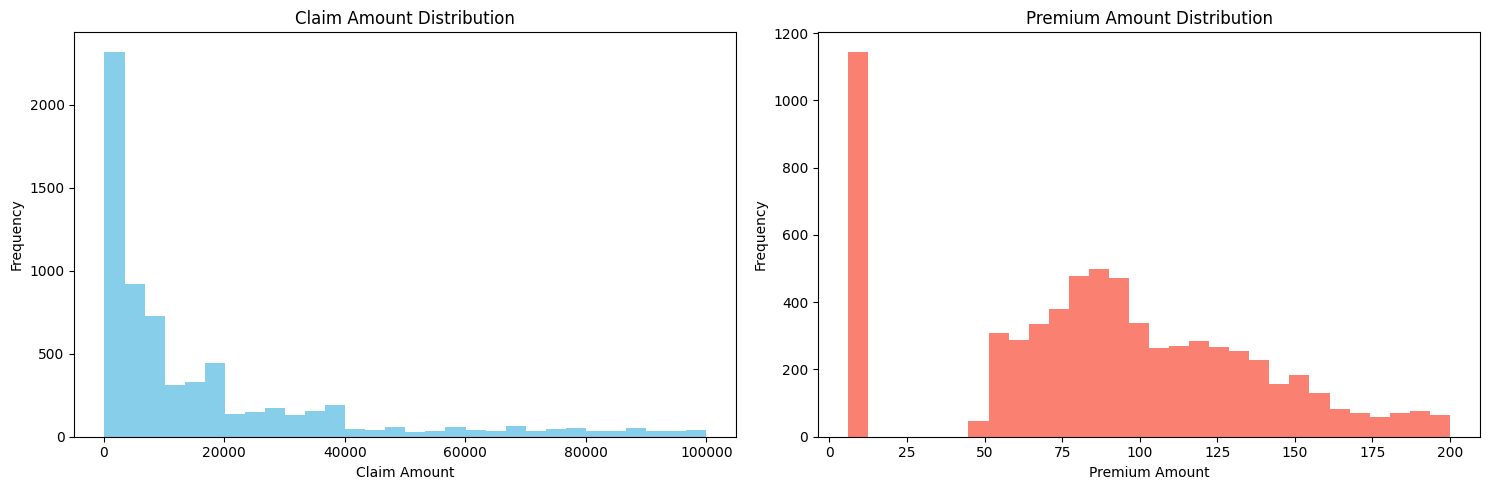

In [18]:
fig1 = go.Figure(data=[go.Pie(
    labels=insurance_type['INSURANCE_TYPE'],
    values=insurance_type['TOTAL_CLAIM_AMOUNT'],
    hole=0.5,
    title='Insurance Type Wise Claim',
    marker_colors=py.colors.sequential.RdBu
)])
fig1.update_traces(text=insurance_type['INSURANCE_TYPE'], textposition='outside')


fig2 = go.Figure(data=[go.Pie(
    labels=insurance_type['INSURANCE_TYPE'],
    values=insurance_type['LIKELIHOOD_FRAUD_CLAIM'],
    hole=0.5,
    title='Insurance Type Wise Fraud Likelihood',
    marker_colors=py.colors.sequential.RdBu
)])
fig2.update_traces(text=insurance_type['INSURANCE_TYPE'], textposition='outside')


figs = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=("Total Claim Amount", "Likelihood of Fraud Claim"))


figs.add_trace(fig1.data[0], row=1, col=1)
figs.add_trace(fig2.data[0], row=1, col=2)


figs.update_layout(title_text="Insurance Type Wise Analysis")
figs.show()


figss = py.choropleth(sate_wise,
                    locations='STATE',
                    locationmode= "USA-states",
                    color='TOTAL_CLAIM_AMOUNT',
                    scope ='usa',
                    hover_data=['TOTAL_CLAIM_AMOUNT','PERCENTAGE_TOTAL_CLAIM', 'LIKELIHOOD_FRAUD_CLAIM'],
                    title='Claim by States',
                    color_continuous_scale='Viridis')
figss.update_layout(mapbox_style='open-street-map')
figss.show()

fig1s = py.bar(incident_severity, x="INCIDENT_SEVERITY", y="INCIDENT_SEV_PERC", template="seaborn", title='Incident Severity Percentage')
fig2s = py.bar(incident_severity, x="INCIDENT_SEVERITY", y="TOTAL_CLAIM_AMOUNT", template="seaborn", title='Total Claim Amount')

fig12s = make_subplots(rows=1, cols=2, subplot_titles=('Incident Severity Percentage', 'Total Claim Amount'))

fig12s.add_trace(fig1s.data[0], row=1, col=1)
fig12s.add_trace(fig2s.data[0], row=1, col=2)
fig12s.update_layout(template="seaborn", title_text="Incident_Severity")

fig12s.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(combineTable['CLAIM_AMOUNT'], bins=30, color='skyblue')
ax1.set_title('Claim Amount Distribution')
ax1.set_xlabel('Claim Amount')
ax1.set_ylabel('Frequency')
ax2.hist(combineTable['PREMIUM_AMOUNT'], bins=30, color='salmon')
ax2.set_title('Premium Amount Distribution')
ax2.set_xlabel('Premium Amount')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()